In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


# Importing Necessary Libraries

In [2]:
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### 1. `from sklearn.impute import SimpleImputer`
- **SimpleImputer**: This is used to handle missing data in datasets. It allows you to fill in missing values with strategies such as the mean, median, most frequent, or a constant value. It's a common preprocessing step to ensure the dataset is complete before feeding it into machine learning models.

### 2. `from matplotlib import pyplot as plt`
- **pyplot**: This is a module in the `matplotlib` library used for creating static, interactive, and animated visualizations in Python. It provides a MATLAB-like interface for plotting, enabling easy creation of plots such as line charts, scatter plots, histograms, and more.

### 3. `from sklearn.model_selection import train_test_split`
- **train_test_split**: This function is used to split a dataset into training and testing subsets. It helps in evaluating the performance of a machine learning model by training it on one portion of the data and testing it on another. This function can randomly split the data and ensures the proportion of training and testing data is consistent.

### 4. `from sklearn.metrics import confusion_matrix, accuracy_score, classification_report`
- **confusion_matrix**: This function computes a confusion matrix to evaluate the accuracy of a classification. The matrix shows the number of true positive, true negative, false positive, and false negative predictions.
- **accuracy_score**: This function calculates the accuracy of a model, which is the ratio of correctly predicted observations to the total observations.
- **classification_report**: This function builds a text report showing the main classification metrics, including precision, recall, F1-score, and support for each class.

### 5. `from sklearn.tree import DecisionTreeClassifier`
- **DecisionTreeClassifier**: This is a class for creating a decision tree classifier. A decision tree is a flowchart-like structure in which each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents the outcome. It is a powerful and interpretable model for both classification and regression tasks.

### 6. `from sklearn.model_selection import cross_val_score`
- **cross_val_score**: This function evaluates a model by cross-validation. It splits the dataset into k folds and trains the model k times, each time using a different fold as the test set and the remaining folds as the training set. It helps in assessing how the model generalizes to an independent dataset.

### 7. `from sklearn.ensemble import BaggingClassifier`
- **BaggingClassifier**: This is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions to form a final prediction. Bagging helps to improve the stability and accuracy of machine learning algorithms by reducing variance and helping to avoid overfitting.

### 8. `from sklearn.ensemble import RandomForestClassifier`
- **RandomForestClassifier**: This is an ensemble learning method for classification (and regression) that operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees. It combines the concept of bagging and random feature selection for better performance.

### 9. `from sklearn.ensemble import ExtraTreesClassifier`
- **ExtraTreesClassifier**: This stands for Extremely Randomized Trees classifier. It is similar to a RandomForestClassifier but differs in the way splits are computed. In ExtraTrees, random splits are picked for each candidate feature and the best of these randomly chosen splits is used to split the node. This often reduces variance even more compared to RandomForest, sometimes at the cost of an increase in bias.

These libraries and functions/classes provide a robust toolkit for data preprocessing, visualization, model evaluation, and implementing various machine learning algorithms to create effective predictive models.

# Importing the Dataset

In [3]:
df = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1. `pd.read_csv("/kaggle/input/diabetes/diabetes.csv")`
- **`pd`**: This is a common alias for the `pandas` library, which is a powerful data manipulation and analysis library in Python.
- **`read_csv`**: This is a function provided by `pandas` to read a comma-separated values (CSV) file into a DataFrame. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types, similar to a table in a database or an Excel spreadsheet.
- **`"/kaggle/input/diabetes/diabetes.csv"`**: This is the file path to the CSV file that contains the diabetes dataset. The path indicates that the file is located in a directory named `/kaggle/input/diabetes/` on the Kaggle platform.

### 2. `df`
- **`df`**: This variable stores the DataFrame created by reading the CSV file. The DataFrame `df` will contain the data from `diabetes.csv`.

### 3. `df` (on its own line)
- When `df` is placed on a line by itself in a Jupyter notebook (such as a Kaggle notebook), it triggers the display of the DataFrame. The notebook environment will render the contents of the DataFrame in a tabular format, making it easy to inspect the data visually.


### Summary

In summary, this code snippet reads a CSV file located at `/kaggle/input/diabetes/diabetes.csv` into a `pandas` DataFrame named `df` and then displays the contents of `df` when run in a Jupyter notebook environment. This is a common first step in data analysis and machine learning projects to load and inspect the dataset.

## Dataset Description

The diabetes dataset, often referred to in the context of the Pima Indians Diabetes Database, is a classic dataset used for binary classification problems in machine learning. It is commonly used to demonstrate various data analysis and machine learning techniques.

### Overview of the Diabetes Dataset

The dataset contains medical information for a sample of female patients of Pima Indian heritage, all of whom are at least 21 years old. The primary goal is to predict whether a patient has diabetes based on certain diagnostic measurements.

### Attributes (Features)

The dataset typically consists of the following columns (features):

1. **Pregnancies**: Number of times the patient has been pregnant.
2. **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. **BloodPressure**: Diastolic blood pressure (mm Hg).
4. **SkinThickness**: Triceps skin fold thickness (mm).
5. **Insulin**: 2-Hour serum insulin (mu U/ml).
6. **BMI**: Body mass index (weight in kg/(height in m)^2).
7. **DiabetesPedigreeFunction**: Diabetes pedigree function, which is a function that scores the likelihood of diabetes based on family history.
8. **Age**: Age of the patient (years).
9. **Outcome**: Class variable (0 or 1), where 1 indicates the presence of diabetes and 0 indicates the absence.

### Target Variable

- **Outcome**: This is the target variable that the models aim to predict. It is a binary variable with values:
  - `0`: The patient does not have diabetes.
  - `1`: The patient has diabetes.


In summary, the diabetes dataset provides a practical case for applying various data science techniques, from data preprocessing and visualization to model building and evaluation, making it an excellent resource for learning and experimentation.

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Explanation

1. **`df`**:
   - This is a pandas DataFrame, typically created by reading data from a file such as a CSV.

2. **`isnull()`**:
   - This is a pandas function that checks for missing values (NaNs) in the DataFrame.
   - It returns a DataFrame of the same shape as `df` with boolean values: `True` for missing entries and `False` for non-missing entries.

3. **`sum()`**:
   - This function is then called on the DataFrame returned by `isnull()`.
   - When called on a DataFrame, `sum()` adds up the `True` values (which are equivalent to 1) along the specified axis (by default, the axis is 0, which means columns).

### Combined Operation

When combined, `df.isnull().sum()` performs the following:

- **`df.isnull()`**: Generates a DataFrame of the same size as `df` but with `True` for NaN values and `False` for non-NaN values.
  

- **`.sum()`**: Adds up the `True` values (equivalent to 1) for each column, giving the total count of missing values per column.



### Purpose

The purpose of this code is to identify and quantify the missing values in each column of the DataFrame. This is a crucial step in data preprocessing, as handling missing values is often necessary before performing any further analysis or training machine learning models.


In summary, `df.isnull().sum()` is a concise and effective way to check for and count missing values in each column of a pandas DataFrame.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Explanation

The `describe()` method provides a summary of statistics pertaining to the DataFrame's numerical columns. By default, it includes the following statistics for each numerical column:

- **Count**: The number of non-missing values.
- **Mean**: The average of the values.
- **Std (Standard Deviation)**: The standard deviation of the values, which measures the amount of variation or dispersion of the values.
- **Min**: The minimum value.
- **25%**: The 25th percentile (also known as the first quartile), indicating that 25% of the data points are below this value.
- **50%**: The 50th percentile (also known as the median), indicating that 50% of the data points are below this value.
- **75%**: The 75th percentile (also known as the third quartile), indicating that 75% of the data points are below this value.
- **Max**: The maximum value.

### Purpose

The purpose of using `df.describe()` is to get a quick statistical summary of the numerical data in the DataFrame. This summary provides insights into the distribution and spread of the data, helping to identify:
- **Outliers**: Extremely high or low values.
- **Central Tendency**: Mean and median values to understand the center of the data.
- **Spread**: Standard deviation and range (min to max) to understand the variability in the data.
- **Data Quality**: By comparing counts across columns, one can detect missing values (if `count` is less than the total number of rows).

### Usage in Data Analysis

In data analysis, `df.describe()` is commonly used during the exploratory data analysis (EDA) phase to:
- Get an initial understanding of the dataset.
- Identify potential issues with the data, such as outliers or missing values.
- Formulate hypotheses about the data.
- Guide further detailed analysis and data cleaning steps.

In summary, `df.describe()` is a powerful tool for quickly obtaining a statistical overview of a pandas DataFrame, aiding in the understanding and analysis of the data.

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Explanation

When combined, `df['Outcome'].value_counts()` performs the following:

- **`df['Outcome']`**: Selects the 'Outcome' column from the DataFrame, resulting in a Series of binary values (0 and 1).
- **`value_counts()`**: Counts the number of occurrences of each unique value (0 and 1) in the 'Outcome' Series.


This output indicates that:
- There are 500 instances where the 'Outcome' is `0` (the patient does not have diabetes).
- There are 268 instances where the 'Outcome' is `1` (the patient has diabetes).

### Purpose

The purpose of using `df['Outcome'].value_counts()` is to:
- Get a quick summary of the distribution of the target variable ('Outcome') in the dataset.
- Understand the class balance or imbalance in the dataset.

### Usage in Data Analysis

In data analysis and machine learning, understanding the distribution of the target variable is crucial for several reasons:
- **Class Imbalance**: Identifying if there is an imbalance between classes, which can affect model performance. In classification problems, highly imbalanced classes might require special techniques such as resampling (oversampling the minority class or undersampling the majority class), using different evaluation metrics, or applying specific algorithms designed to handle imbalance.
- **Exploratory Data Analysis (EDA)**: Providing insights into the data, which can guide further analysis and preprocessing steps.

In summary, `df['Outcome'].value_counts()` is a simple yet powerful way to obtain the frequency distribution of the values in the 'Outcome' column, helping to understand the class distribution in the dataset.

# Data Pre-Processing

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
col = df.columns[:-1]
col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [9]:
for i in col:
    print(i, len(df.loc[df[i] == 0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


### Explanation

1. **`df.columns[:-1]`**:
   - `df.columns` is a pandas property that returns an Index object containing the column labels of the DataFrame `df`.
   - `[:-1]` is slicing notation that selects all columns except the last one. This is useful if the last column is the target variable, and you want to focus on the feature columns.

2. **`col = df.columns[:-1]`**:
   - This assigns the list of all columns except the last one to the variable `col`.

3. **`for i in col:`**:
   - This initiates a for loop that iterates over each column name in `col`.

4. **`df.loc[df[i] == 0]`**:
   - `df.loc` is used to access a group of rows and columns by labels or a boolean array.
   - `df[i] == 0` creates a boolean Series that is `True` where the column `i` has a value of 0 and `False` elsewhere.
   - `df.loc[df[i] == 0]` selects all rows where the column `i` has a value of 0.

5. **`len(df.loc[df[i] == 0])`**:
   - This calculates the number of rows where the column `i` has a value of 0 by getting the length of the DataFrame subset created by `df.loc[df[i] == 0]`.

6. **`print(i, len(df.loc[df[i] == 0]))`**:
   - This prints the column name `i` followed by the count of rows where the column `i` has a value of 0.

### Combined Operation

This code iterates through each column (except the last one) in the DataFrame `df` and prints the name of the column along with the number of rows where the column value is 0.

### Purpose

The purpose of this code is to identify and count the occurrences of zero values in each feature column of the DataFrame. This can be particularly useful for identifying columns where 0 might be used as a placeholder for missing or special values.

This output indicates:
- There are 111 rows where 'Pregnancies' is 0.
- There are 5 rows where 'Glucose' is 0.
- And so on for each column.

### Usage in Data Analysis

Identifying zero values is useful because:
- **Data Cleaning**: Zeros might represent missing or invalid data, especially for biological measurements like glucose or BMI where a value of 0 is not feasible.
- **Feature Engineering**: Knowing where zeros occur can help in deciding how to handle them (e.g., imputation, removal, or special treatment).
- **Exploratory Data Analysis (EDA)**: Provides insights into the data distribution and potential issues that need to be addressed before applying machine learning algorithms.

In summary, this code snippet is used to count and print the number of zero values in each feature column of a DataFrame, which is an essential step in understanding and preprocessing the dataset.

In [10]:
val = SimpleImputer(missing_values = 0, strategy = "mean", copy = False)
df[col] = val.fit_transform(df[col])


for i in col:
    print(i, len(df.loc[df[i] == 0]))

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0


### Explanation

1. **`SimpleImputer(missing_values = 0, strategy = "mean", copy = False)`**:
   - `SimpleImputer`: This is a class from the `sklearn.impute` module used for imputing missing values.
   - `missing_values = 0`: This parameter specifies that the value `0` should be treated as missing. This is useful when `0` is used as a placeholder for missing data.
   - `strategy = "mean"`: This parameter specifies that missing values should be replaced with the mean of the column.
   - `copy = False`: This parameter specifies that the imputation should be done in place, modifying the existing DataFrame instead of creating a copy.

2. **`val = SimpleImputer(missing_values = 0, strategy = "mean", copy = False)`**:
   - This line creates an instance of `SimpleImputer` with the specified parameters, stored in the variable `val`.

3. **`df[col] = val.fit_transform(df[col])`**:
   - `df[col]`: This selects the columns specified in `col` from the DataFrame `df`.
   - `val.fit_transform(df[col])`: This method fits the imputer on the selected columns (calculates the mean of each column) and then transforms the columns by replacing the missing values (`0`s) with the calculated means.
   - The transformed columns are then assigned back to `df[col]`, effectively updating the DataFrame with the imputed values.

4. **`for i in col:`**:
   - This initiates a for loop that iterates over each column name in `col`.

5. **`print(i, len(df.loc[df[i] == 0]))`**:
   - This prints the name of the column `i` and the number of rows where the column `i` has a value of `0` after the imputation.

### Combined Operation

The code performs the following steps:
1. Identifies `0` values in the specified columns (`col`) as missing values.
2. Replaces these `0` values with the mean of the respective columns.
3. Prints the count of `0` values in each column after the imputation to verify if there are any remaining `0` values.

### Example in Context

1. Any `0` values in columns such as `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, etc., are replaced with the mean of the respective column.
2. After the imputation, the script prints out the count of remaining `0` values for each column.



### Purpose

The purpose of this code is to handle missing values (represented as `0`s) in the dataset by replacing them with the mean of the respective columns, ensuring that the data is suitable for further analysis or machine learning modeling. The subsequent print statements help verify that the imputation was successful.

### Usage in Data Analysis

This code snippet is part of the data preprocessing phase, ensuring that the dataset has no missing values that could negatively impact the performance of machine learning algorithms. It is crucial for:
- **Data Cleaning**: Replacing invalid or placeholder values with meaningful statistical values.
- **Model Training**: Ensuring the data fed into machine learning models is complete and clean, leading to better model performance.

# Visualizations

<Axes: title={'center': 'Pregnancies'}, ylabel='Frequency'>

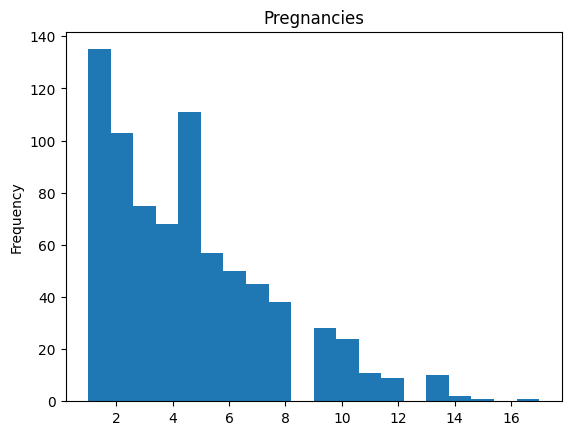

In [11]:
df['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')

### Explanation

1. **`df['Pregnancies']`**:
   - This accesses the 'Pregnancies' column from the pandas DataFrame `df`.

2. **`.plot()`**:
   - This is a pandas method that provides a simple interface for plotting data from a DataFrame or Series.

3. **`kind='hist'`**:
   - The `kind` parameter specifies the type of plot. In this case, `'hist'` indicates that a histogram should be plotted.
   - A histogram is a graphical representation of the distribution of a dataset. It partitions the data into bins (intervals) and shows how many data points fall into each bin.

4. **`bins=20`**:
   - The `bins` parameter specifies the number of bins (intervals) to use in the histogram. Here, the histogram will divide the 'Pregnancies' data into 20 bins.
   - The choice of bins can affect the appearance and interpretation of the histogram.

5. **`title='Pregnancies'`**:
   - The `title` parameter sets the title of the plot. In this case, the plot will have the title 'Pregnancies'.

### Combined Operation

The code creates and displays a histogram of the 'Pregnancies' column from the DataFrame `df`, dividing the data into 20 bins and setting the title of the plot to 'Pregnancies'.

### Purpose

The purpose of this code is to visualize the distribution of the 'Pregnancies' column in the dataset. This helps to understand:

- **Frequency Distribution**: How frequently different numbers of pregnancies occur in the dataset.
- **Central Tendency**: Where most data points are concentrated (e.g., around 0-2 pregnancies).
- **Spread and Range**: How spread out the data points are, and the range of values.
- **Outliers**: If there are any unusual values (e.g., a very high number of pregnancies).

### Usage in Data Analysis

Creating histograms is a fundamental part of Exploratory Data Analysis (EDA). Histograms provide insights into the structure and distribution of the data, which is crucial for:

- **Identifying Data Patterns**: Recognizing common patterns, such as skewness or bimodality.
- **Detecting Anomalies**: Spotting outliers or unusual values that may need further investigation.
- **Guiding Data Preprocessing**: Informing decisions about data normalization, scaling, or transformations.

In summary, `df['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')` is a straightforward way to visualize the distribution of the 'Pregnancies' column in a dataset, providing valuable insights into the data's characteristics.

<Axes: title={'center': 'Glucose'}, ylabel='Frequency'>

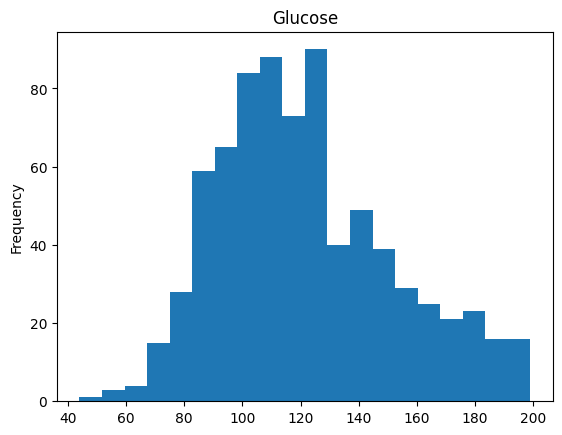

In [12]:
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')

### Explanation

1. **`df['Glucose']`**:
   - This accesses the 'Glucose' column from the pandas DataFrame `df`.

2. **`.plot()`**:
   - This is a pandas method that provides a simple interface for plotting data from a DataFrame or Series.

3. **`kind='hist'`**:
   - The `kind` parameter specifies the type of plot. In this case, `'hist'` indicates that a histogram should be plotted.
   - A histogram is a graphical representation of the distribution of a dataset. It partitions the data into bins (intervals) and shows how many data points fall into each bin.

4. **`bins=20`**:
   - The `bins` parameter specifies the number of bins (intervals) to use in the histogram. Here, the histogram will divide the 'Glucose' data into 20 bins.
   - The choice of bins can affect the appearance and interpretation of the histogram.

5. **`title='Glucose'`**:
   - The `title` parameter sets the title of the plot. In this case, the plot will have the title 'Glucose'.

### Combined Operation

The code creates and displays a histogram of the 'Glucose' column from the DataFrame `df`, dividing the data into 20 bins and setting the title of the plot to 'Glucose'.


### Purpose

The purpose of this code is to visualize the distribution of the 'Glucose' column in the dataset. This helps to understand:

- **Frequency Distribution**: How frequently different glucose levels occur in the dataset.
- **Central Tendency**: Where most data points are concentrated (e.g., around typical glucose levels).
- **Spread and Range**: How spread out the data points are, and the range of glucose values.
- **Outliers**: If there are any unusual glucose values (e.g., very high or very low levels).

### Usage in Data Analysis

Creating histograms is a fundamental part of Exploratory Data Analysis (EDA). Histograms provide insights into the structure and distribution of the data, which is crucial for:

- **Identifying Data Patterns**: Recognizing common patterns, such as skewness or bimodality in glucose levels.
- **Detecting Anomalies**: Spotting outliers or unusual glucose values that may need further investigation.
- **Guiding Data Preprocessing**: Informing decisions about data normalization, scaling, or transformations.

In summary, `df['Glucose'].plot(kind='hist', bins=20, title='Glucose')` is a straightforward way to visualize the distribution of the 'Glucose' column in a dataset, providing valuable insights into the data's characteristics.

<Axes: title={'center': 'BloodPressure'}, ylabel='Frequency'>

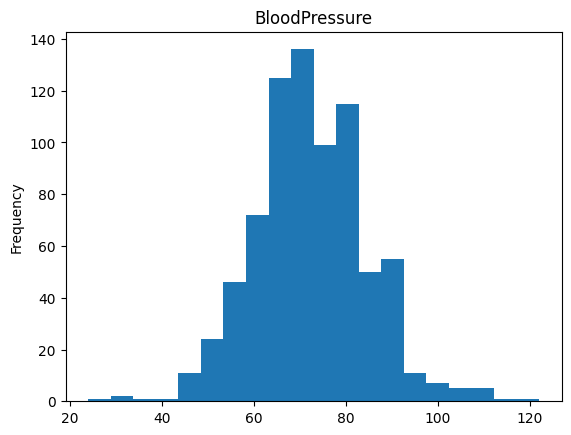

In [13]:
df['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')

<Axes: title={'center': 'BMI'}, ylabel='Frequency'>

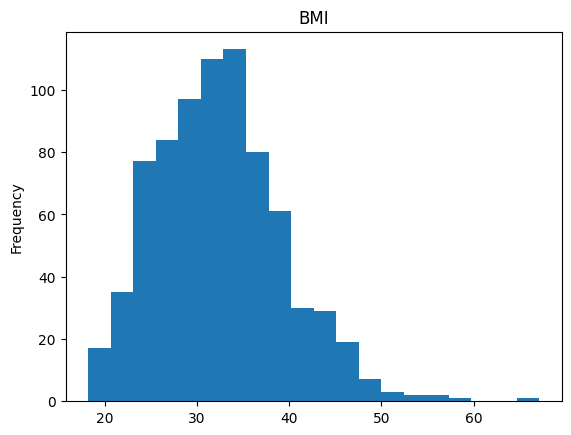

In [14]:
df['BMI'].plot(kind='hist', bins=20, title='BMI')

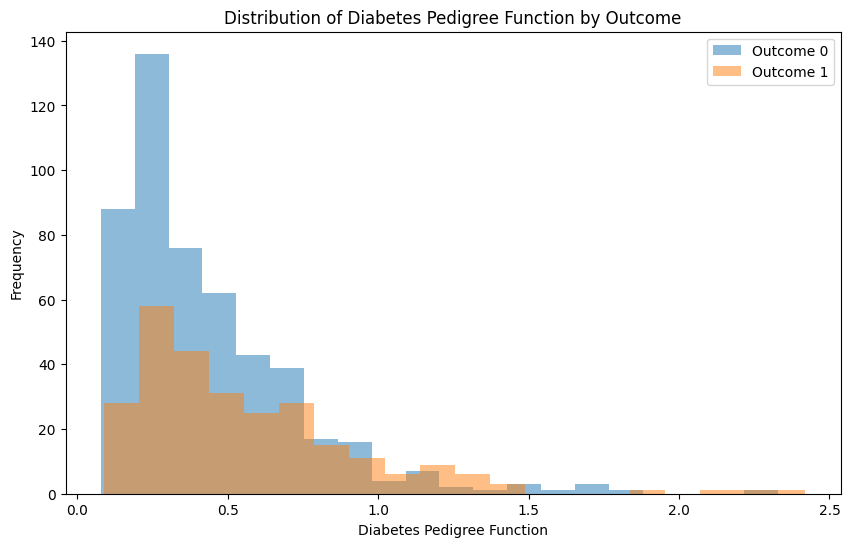

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'], alpha=0.5, label='Outcome 0', bins=20)
plt.hist(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'], alpha=0.5, label='Outcome 1', bins=20)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Pedigree Function by Outcome')
_ = plt.legend()


### Explanation

1. **`plt.figure(figsize=(10, 6))`**:
   - `plt.figure()` is a function from the matplotlib library used to create a new figure for plotting.
   - `figsize=(10, 6)` sets the size of the figure to 10 inches in width and 6 inches in height.

2. **`plt.hist(df[df['Outcome'] == 0]['DiabetesPedigreeFunction'], alpha=0.5, label='Outcome 0', bins=20)`**:
   - `plt.hist()` is a function in matplotlib used to plot a histogram.
   - `df[df['Outcome'] == 0]['DiabetesPedigreeFunction']` selects the 'DiabetesPedigreeFunction' column from rows where 'Outcome' is 0.
   - `alpha=0.5` sets the transparency of the histogram bars to 50%.
   - `label='Outcome 0'` assigns a label to this histogram, which will be used in the legend.
   - `bins=20` specifies the number of bins (intervals) to use in the histogram.

3. **`plt.hist(df[df['Outcome'] == 1]['DiabetesPedigreeFunction'], alpha=0.5, label='Outcome 1', bins=20)`**:
   - Similar to the previous line, this plots a histogram for the 'DiabetesPedigreeFunction' column where 'Outcome' is 1.
   - `alpha=0.5` and `label='Outcome 1'` are used similarly to the previous `plt.hist()` call.

4. **`plt.xlabel('Diabetes Pedigree Function')`**:
   - Sets the label for the x-axis of the plot.

5. **`plt.ylabel('Frequency')`**:
   - Sets the label for the y-axis of the plot.

6. **`plt.title('Distribution of Diabetes Pedigree Function by Outcome')`**:
   - Sets the title of the plot.

7. **`_ = plt.legend()`**:
   - `plt.legend()` displays the legend on the plot, automatically using the labels provided in the `plt.hist()` calls.
   - `_ = ` is used to suppress the output of `plt.legend()` to avoid displaying unnecessary information in the notebook.

### Combined Operation

This code creates a figure with a size of 10x6 inches and plots two histograms on the same plot:
- One histogram shows the distribution of 'DiabetesPedigreeFunction' for rows where 'Outcome' is 0 (no diabetes).
- The other histogram shows the distribution of 'DiabetesPedigreeFunction' for rows where 'Outcome' is 1 (diabetes).
- The histograms are overlaid with transparency (`alpha=0.5`) to better visualize their overlap.
- Labels, title, and axis labels are added to provide context and clarity to the plot.

### Purpose

The purpose of this code is to visualize and compare the distribution of the 'DiabetesPedigreeFunction' feature between two different outcomes ('Outcome' 0 and 'Outcome' 1). This visualization helps to understand how the 'DiabetesPedigreeFunction' values are distributed among diabetic and non-diabetic individuals in the dataset.

### Usage in Data Analysis

Such visualizations are essential in Exploratory Data Analysis (EDA) to:
- **Compare Distributions**: Understand how different variables behave across different categories (in this case, diabetic and non-diabetic outcomes).
- **Identify Patterns**: Spot any differences or similarities in the distributions that might be relevant for modeling or further analysis.
- **Hypothesis Generation**: Formulate hypotheses about potential relationships between variables based on visual patterns observed.

In summary, this code snippet uses matplotlib to create a histogram overlay plot to compare the distribution of 'DiabetesPedigreeFunction' across two outcomes ('Outcome' 0 and 'Outcome' 1) in the dataset, providing insights into the relationship between this feature and the target variable.

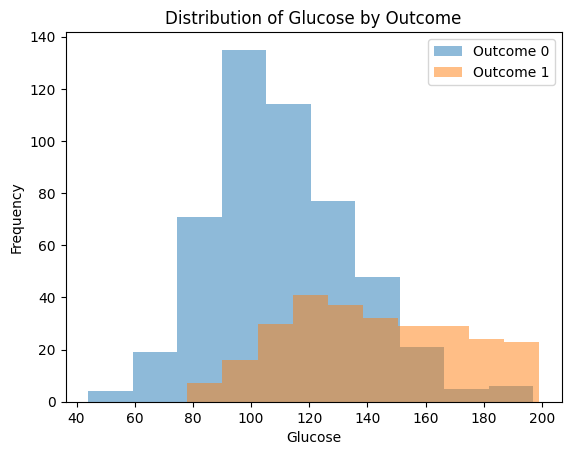

In [16]:
plt.hist(df[df['Outcome'] == 0]['Glucose'], alpha=0.5, label='Outcome 0')
plt.hist(df[df['Outcome'] == 1]['Glucose'], alpha=0.5, label='Outcome 1')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose by Outcome')
_ = plt.legend()

### Explanation

1. **`plt.hist(df[df['Outcome'] == 0]['Glucose'], alpha=0.5, label='Outcome 0')`**:
   - `plt.hist()` is a function in matplotlib used to plot a histogram.
   - `df[df['Outcome'] == 0]['Glucose']` selects the 'Glucose' column from rows where 'Outcome' is 0.
   - `alpha=0.5` sets the transparency of the histogram bars to 50%.
   - `label='Outcome 0'` assigns a label to this histogram, which will be used in the legend.

2. **`plt.hist(df[df['Outcome'] == 1]['Glucose'], alpha=0.5, label='Outcome 1')`**:
   - Similar to the previous line, this plots a histogram for the 'Glucose' column where 'Outcome' is 1.
   - `alpha=0.5` and `label='Outcome 1'` are used similarly to the previous `plt.hist()` call.

3. **`plt.xlabel('Glucose')`**:
   - Sets the label for the x-axis of the plot to 'Glucose'.

4. **`plt.ylabel('Frequency')`**:
   - Sets the label for the y-axis of the plot to 'Frequency'.

5. **`plt.title('Distribution of Glucose by Outcome')`**:
   - Sets the title of the plot to 'Distribution of Glucose by Outcome'.

6. **`_ = plt.legend()`**:
   - `plt.legend()` displays the legend on the plot, automatically using the labels provided in the `plt.hist()` calls.
   - `_ = ` is used to suppress the output of `plt.legend()` to avoid displaying unnecessary information in the notebook.

### Combined Operation

This code creates a histogram plot to visualize the distribution of the 'Glucose' column in the DataFrame `df` based on the outcome ('Outcome' column). Specifically:
- It plots two histograms on the same plot:
  - One histogram shows the distribution of 'Glucose' for rows where 'Outcome' is 0 (no diabetes).
  - The other histogram shows the distribution of 'Glucose' for rows where 'Outcome' is 1 (diabetes).
- The histograms are overlaid with transparency (`alpha=0.5`) to better visualize their overlap.
- Labels (`label='Outcome 0'` and `label='Outcome 1'`), title, and axis labels are added to provide context and clarity to the plot.

### Purpose

The purpose of this code is to visually compare the distribution of the 'Glucose' levels between two different outcomes ('Outcome' 0 and 'Outcome' 1). This visualization helps to understand how 'Glucose' levels differ between diabetic and non-diabetic individuals in the dataset.

### Usage in Data Analysis

Visualizations like this are crucial in Exploratory Data Analysis (EDA) to:
- **Compare Distributions**: Understand how a particular feature ('Glucose' in this case) behaves across different categories (diabetic and non-diabetic outcomes).
- **Identify Patterns**: Detect any differences or similarities in the distributions that might be relevant for further analysis or modeling.
- **Hypothesis Generation**: Formulate hypotheses about potential relationships between variables based on visual patterns observed.

In summary, this code snippet uses matplotlib to create a histogram overlay plot to compare the distribution of 'Glucose' levels across two outcomes ('Outcome' 0 and 'Outcome' 1) in the dataset, providing insights into the relationship between this feature and the target variable.

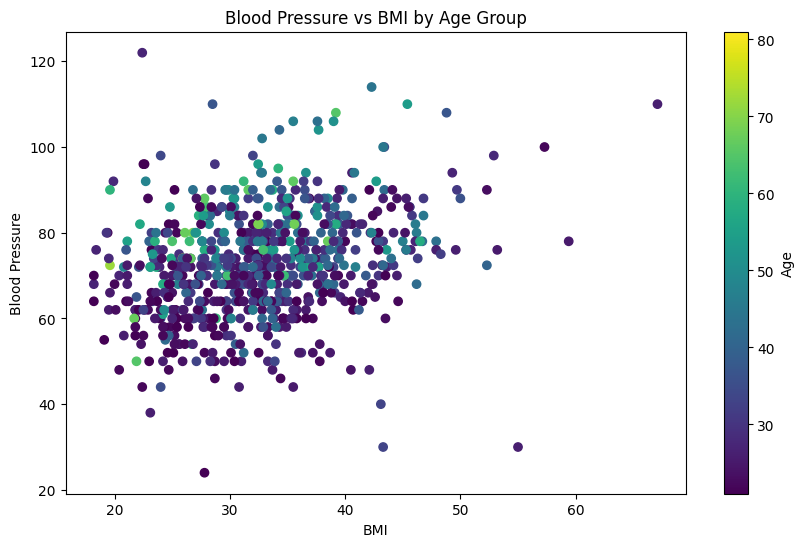

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['BloodPressure'], c=df['Age'], cmap='viridis')
plt.colorbar(label='Age')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
_ = plt.title('Blood Pressure vs BMI by Age Group')

### Explanation

1. **`plt.figure(figsize=(10, 6))`**:
   - `plt.figure()` is a function from the matplotlib library used to create a new figure for plotting.
   - `figsize=(10, 6)` sets the size of the figure to 10 inches in width and 6 inches in height. This ensures that the subsequent plot (`scatter` plot in this case) will be displayed in a larger, more readable format.

2. **`plt.scatter(df['BMI'], df['BloodPressure'], c=df['Age'], cmap='viridis')`**:
   - `plt.scatter()` is a function in matplotlib used to create a scatter plot.
   - `df['BMI']` and `df['BloodPressure']` are used as the x-axis and y-axis data, respectively.
   - `c=df['Age']` specifies that the color of each point in the scatter plot will be based on the values in the 'Age' column of the DataFrame `df`.
   - `cmap='viridis'` specifies the colormap to use for mapping the 'Age' values to colors. 'Viridis' is a perceptually uniform colormap which is helpful in visualizing continuous data.

3. **`plt.colorbar(label='Age')`**:
   - `plt.colorbar()` adds a colorbar to the plot, which provides a visual representation of the mapping between colors and values.
   - `label='Age'` sets the label for the colorbar to 'Age', indicating that the color of each point corresponds to the age value in the dataset.

4. **`plt.xlabel('BMI')`**:
   - Sets the label for the x-axis of the plot to 'BMI'.

5. **`plt.ylabel('Blood Pressure')`**:
   - Sets the label for the y-axis of the plot to 'Blood Pressure'.

6. **`_ = plt.title('Blood Pressure vs BMI by Age Group')`**:
   - Sets the title of the plot to 'Blood Pressure vs BMI by Age Group'.
   - `_ = ` is used to suppress the output of `plt.title()` to avoid displaying unnecessary information in the notebook.

### Combined Operation

This code creates a scatter plot to visualize the relationship between 'BMI' (Body Mass Index) and 'Blood Pressure', with the color of each point representing the age of individuals in the dataset. The figure size is set to 10x6 inches for better readability. Additional annotations such as axis labels, a colorbar, and a title are included to provide context and interpretation for the plot.

### Purpose

The purpose of this code is to explore and visualize how 'BMI' and 'Blood Pressure' are related across different age groups. By using color to represent age, the plot can reveal any patterns or correlations between these variables and age.

### Usage in Data Analysis

Scatter plots with color-coded data points (like this one) are valuable in exploratory data analysis (EDA) because they:
- **Show Multivariate Relationships**: Display relationships between multiple variables ('BMI', 'Blood Pressure', and 'Age' in this case) simultaneously.
- **Highlight Patterns**: Identify clusters or trends in the data that may not be evident from individual scatter plots.
- **Facilitate Insight**: Provide a visual means to interpret complex relationships and correlations between variables.

In summary, this code snippet uses matplotlib to create a scatter plot where 'BMI' and 'Blood Pressure' are plotted against each other, with colors representing different age groups. It helps in understanding how these variables relate across different age categories in the dataset.

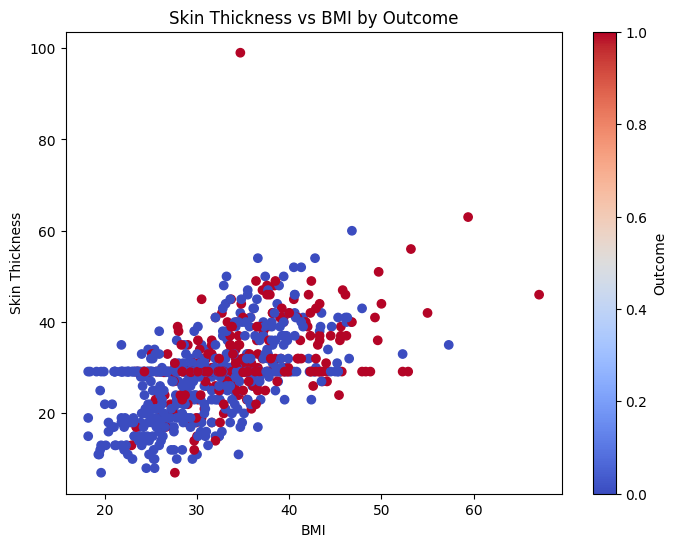

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BMI'], df['SkinThickness'], c=df['Outcome'], cmap='coolwarm')
plt.colorbar(label='Outcome')
plt.xlabel('BMI')
plt.ylabel('Skin Thickness')
_ = plt.title('Skin Thickness vs BMI by Outcome')

### Explanation

1. **`plt.figure(figsize=(8, 6))`**:
   - `plt.figure()` is a function from the matplotlib library used to create a new figure for plotting.
   - `figsize=(8, 6)` sets the size of the figure to 8 inches in width and 6 inches in height. This ensures that the subsequent plot (`scatter` plot in this case) will be displayed in a larger, more readable format.

2. **`plt.scatter(df['BMI'], df['SkinThickness'], c=df['Outcome'], cmap='coolwarm')`**:
   - `plt.scatter()` is a function in matplotlib used to create a scatter plot.
   - `df['BMI']` and `df['SkinThickness']` are used as the x-axis and y-axis data, respectively.
   - `c=df['Outcome']` specifies that the color of each point in the scatter plot will be based on the values in the 'Outcome' column of the DataFrame `df`.
   - `cmap='coolwarm'` specifies the colormap to use for mapping the 'Outcome' values to colors. 'Coolwarm' is a colormap that ranges from blue (representing Outcome 0) to red (representing Outcome 1).

3. **`plt.colorbar(label='Outcome')`**:
   - `plt.colorbar()` adds a colorbar to the plot, which provides a visual representation of the mapping between colors and values.
   - `label='Outcome'` sets the label for the colorbar to 'Outcome', indicating that the color of each point corresponds to the outcome value (0 or 1) in the dataset.

4. **`plt.xlabel('BMI')`**:
   - Sets the label for the x-axis of the plot to 'BMI'.

5. **`plt.ylabel('Skin Thickness')`**:
   - Sets the label for the y-axis of the plot to 'Skin Thickness'.

6. **`_ = plt.title('Skin Thickness vs BMI by Outcome')`**:
   - Sets the title of the plot to 'Skin Thickness vs BMI by Outcome'.
   - `_ = ` is used to suppress the output of `plt.title()` to avoid displaying unnecessary information in the notebook.

### Combined Operation

This code creates a scatter plot to visualize the relationship between 'BMI' (Body Mass Index) and 'Skin Thickness', with the color of each point representing the outcome ('Outcome' column) of individuals in the dataset. The figure size is set to 8x6 inches for better readability. Additional annotations such as axis labels, a colorbar, and a title are included to provide context and interpretation for the plot.

### Purpose

The purpose of this code is to explore and visualize how 'BMI' and 'Skin Thickness' are related across different outcomes (0 and 1) in the dataset. By using color to represent the outcome, the plot can reveal any patterns or correlations between these variables and the likelihood of diabetes (Outcome).

### Usage in Data Analysis

Scatter plots with color-coded data points (like this one) are useful in exploratory data analysis (EDA) because they:
- **Show Multivariate Relationships**: Display relationships between multiple variables ('BMI', 'Skin Thickness', and 'Outcome' in this case) simultaneously.
- **Highlight Patterns**: Identify clusters or trends in the data that may not be evident from individual scatter plots.
- **Facilitate Insight**: Provide a visual means to interpret complex relationships and correlations between variables.

In summary, this code snippet uses matplotlib to create a scatter plot where 'BMI' and 'Skin Thickness' are plotted against each other, with colors representing different outcomes (0 and 1). It helps in understanding how these variables relate to the likelihood of diabetes as indicated by the 'Outcome' column in the dataset.

# Train - Test - Split

In [19]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 42)

### Explanation

1. **`train_test_split()`**:
   - `train_test_split` is a function from the `sklearn.model_selection` module in scikit-learn (imported earlier as `from sklearn.model_selection import train_test_split`).
   - It splits arrays or matrices (`x` and `y`) into random train and test subsets.
   - The function signature is `train_test_split(arrays, options)`, where:
     - `arrays`: This refers to the data to be split, typically `x` (features) and `y` (target).
     - `options`: Additional parameters to control the split.

2. **`x` and `y`**:
   - `x` typically represents the feature dataset (independent variables).
   - `y` typically represents the target dataset (dependent variable or label).

3. **`stratify=y`**:
   - The `stratify` parameter ensures that the train and test datasets have the same proportion of class labels as the input dataset `y`.
   - This is particularly useful for classification tasks where the target variable `y` is categorical.
   - Ensuring that each class is proportionally represented in both training and testing sets helps in maintaining the overall distribution of the target variable.

4. **`random_state=42`**:
   - `random_state` is used to ensure reproducibility of the split.
   - When `random_state` is set to a specific integer (here, 42), `train_test_split()` will always split the data in the same way if run multiple times, provided the same dataset and parameters are used.
   - This is crucial for reproducibility in machine learning experiments.

5. **`x_train, x_test, y_train, y_test`**:
   - These variables hold the resulting training and testing sets after splitting.
   - `x_train` and `y_train` are the training set features and labels, respectively.
   - `x_test` and `y_test` are the testing set features and labels, respectively.

### Purpose

The purpose of splitting a dataset into training and testing sets is to evaluate the performance of a machine learning model. Typically, the model is trained on the training set (`x_train` and `y_train`) and then evaluated on the unseen testing set (`x_test` and `y_test`). This split helps in assessing how well the model generalizes to new, unseen data.

### Usage in Machine Learning

- **Model Training**: The training set (`x_train`, `y_train`) is used to fit the model and adjust its parameters.
- **Model Evaluation**: The testing set (`x_test`, `y_test`) is used to evaluate the model's performance and assess its predictive ability on new data.
- **Validation**: By comparing model performance on training and testing sets, one can detect issues such as overfitting (where the model performs well on training data but poorly on testing data).

In summary, `train_test_split()` is a fundamental function in machine learning for splitting datasets into training and testing sets, enabling robust model evaluation and validation. The `stratify` parameter ensures balanced class distributions in the splits, and `random_state` ensures reproducibility of the split across different runs.

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((576, 8), (576,), (192, 8), (192,))

In [22]:
def evalute(model, x_train, x_test, y_train, y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)
    
    print("Training Results\n")
    
    rep = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print("Confusion Matrix\n",confusion_matrix(y_train, y_train_pred))
    print("Accuracy Score\n",accuracy_score(y_train, y_train_pred))
    print("Classification Report",rep)
    
    print("\nTesting Results\n")
    
    rep = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    print("Confusion Matrix\n",confusion_matrix(y_test, y_test_pred))
    print("Accuracy Score\n",accuracy_score(y_test, y_test_pred))
    print("Classification Report",rep)
    
    

This Python function `evaluate` is designed to evaluate the performance of a machine learning model on both training and testing datasets. 

### Explanation

1. **Function Definition**:
   - `def evaluate(model, x_train, x_test, y_train, y_test):`
     - This defines a function named `evaluate` that takes five parameters:
       - `model`: The machine learning model to evaluate (assumed to have a `predict` method).
       - `x_train`: The features of the training set.
       - `x_test`: The features of the testing set.
       - `y_train`: The true labels of the training set.
       - `y_test`: The true labels of the testing set.

2. **Predictions**:
   - `y_train_pred = model.predict(x_train)`: Predicts labels for the training set using the provided model.
   - `y_test_pred  = model.predict(x_test)`: Predicts labels for the testing set using the provided model.

3. **Printing Training Results**:
   - Prints training evaluation metrics:
     - **Confusion Matrix**: Shows the number of true positive, true negative, false positive, and false negative predictions.
     - **Accuracy Score**: Calculates the accuracy of the model on the training set.
     - **Classification Report**: Provides precision, recall, F1-score, and support metrics for each class in the training set.

4. **Printing Testing Results**:
   - Prints testing evaluation metrics:
     - **Confusion Matrix**: Shows the number of true positive, true negative, false positive, and false negative predictions for the testing set.
     - **Accuracy Score**: Calculates the accuracy of the model on the testing set.
     - **Classification Report**: Provides precision, recall, F1-score, and support metrics for each class in the testing set.

5. **Output Formatting**:
   - Uses pandas (`pd.DataFrame`) to format the classification report into a DataFrame for better presentation and analysis.

### Purpose

The purpose of this `evaluate` function is to streamline the process of evaluating a machine learning model by:
- Generating predictions on both training and testing datasets.
- Calculating and printing key evaluation metrics (confusion matrix, accuracy score, and classification report) for both datasets.
- Providing insights into how well the model performs on both seen (training) and unseen (testing) data.

### Usage

- **Model Development**: After fitting a model (`model`) on training data (`x_train`, `y_train`), this function helps assess its performance.
- **Model Comparison**: Facilitates comparison of multiple models by providing standardized evaluation outputs.
- **Tuning**: Helps in tuning model hyperparameters based on evaluation metrics.
- **Reporting**: Generates detailed reports that can be used to communicate model performance to stakeholders or for documentation purposes.

In summary, `evaluate` is a utility function that enhances the efficiency and clarity of model evaluation in machine learning workflows, providing essential insights into model performance across training and testing datasets.

# Model Building

## DecisionTree

In [23]:
model = DecisionTreeClassifier()
score = cross_val_score(model, x,y, cv = 5)
score

array([0.63636364, 0.64935065, 0.64935065, 0.83006536, 0.7254902 ])

### Explanation

1. **`model = DecisionTreeClassifier()`**:
   - This line creates an instance of the `DecisionTreeClassifier` class from scikit-learn (`sklearn`).
   - `DecisionTreeClassifier` is a class that implements a decision tree algorithm, which is a supervised learning method used for classification tasks.

2. **`cross_val_score(model, x, y, cv=5)`**:
   - `cross_val_score` is a function from the `sklearn.model_selection` module used for cross-validation.
   - Parameters:
     - `model`: The machine learning model to be evaluated, in this case, a `DecisionTreeClassifier`.
     - `x`: The input features (independent variables) of the dataset.
     - `y`: The target labels (dependent variable) of the dataset.
     - `cv=5`: The number of folds (or partitions) in the cross-validation process. Here, `cv=5` specifies 5-fold cross-validation.

3. **`score`**:
   - `cross_val_score` returns an array of scores, where each score corresponds to the accuracy of the model for each fold in the cross-validation.
   - The variable `score` stores these scores.

### Purpose

The purpose of this code snippet is to:
- Create a `DecisionTreeClassifier` model.
- Use 5-fold cross-validation (`cv=5`) to evaluate the model's performance on the dataset.
- Obtain and store the cross-validation scores in the `score` variable.

### Usage in Machine Learning

- **Model Evaluation**: Cross-validation is used to evaluate how well a model performs on unseen data by partitioning the dataset into multiple subsets (folds). It helps assess the model's robustness and generalization capability.
- **Parameter Tuning**: Cross-validation is often used in hyperparameter tuning to select the optimal parameters that yield the best model performance.
- **Model Selection**: By comparing cross-validation scores across different models, one can select the best-performing model for deployment.

### Output Interpretation

The `score` variable will contain an array of accuracy scores (one for each fold) from the cross-validation process. These scores can be used to assess the average performance of the `DecisionTreeClassifier` model on the dataset and provide insights into its variability across different subsets.

In summary, this code snippet demonstrates how to use `DecisionTreeClassifier` with 5-fold cross-validation to evaluate and obtain performance scores for a classification task, providing essential information for model assessment and selection.

In [24]:
score.mean()

0.6981240981240981

## BaggingClassifier

In [25]:
model = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 1500,
    max_samples = 0.8,
    oob_score = True, ## OUT OF BAG : - used for testing the model- say out of all the samples,29 was not selected in any models, use that 29 to test the model. After testing, whatever the majority/avg score is thats the oob_score
    random_state = 42
)

model.fit(x_train, y_train)
model.oob_score_

0.7638888888888888

### Explanation

1. **`model = BaggingClassifier(...)`**:
   - This initializes a `BaggingClassifier` model from scikit-learn (`sklearn`).
   - **Parameters**:
     - **`estimator=DecisionTreeClassifier()`**: Specifies the base estimator used for the ensemble, which is a `DecisionTreeClassifier` in this case. Each base estimator will be trained on a random subset of the dataset.
     - **`n_estimators=1500`**: Specifies the number of base estimators (decision trees) to create in the ensemble. In this case, 1500 decision trees will be trained.
     - **`max_samples=0.8`**: Specifies the fraction of samples to be used for training each base estimator. Here, 80% (`0.8`) of the training data (`x_train` and `y_train`) will be randomly sampled with replacement for each decision tree.
     - **`oob_score=True`**: Enables out-of-bag (OOB) scoring. OOB score is a method for estimating the performance of the ensemble model without the need for a separate validation set. Each base estimator in the bagging ensemble is trained on a subset of the data, leaving out a fraction of the data (approximately 20% in this case) which serves as a test set for that estimator.
     - **`random_state=42`**: Sets the random seed for reproducibility. The same seed (`42` in this case) ensures that the results are reproducible across different runs.

2. **`model.fit(x_train, y_train)`**:
   - Trains the bagging classifier model (`model`) on the training data (`x_train` and `y_train`).

3. **`model.oob_score_`**:
   - After fitting the model, `model.oob_score_` retrieves the out-of-bag score of the bagging classifier.
   - The out-of-bag score is the accuracy of the ensemble model measured on the out-of-bag samples (the approximately 20% of data that was not used to train each base estimator).
   - It provides an estimate of how well the bagging classifier is expected to perform on unseen data.

### Purpose

The purpose of using a `BaggingClassifier` with out-of-bag scoring (`oob_score=True`) is to:
- **Improve Model Performance**: Bagging (Bootstrap Aggregating) improves model accuracy and reduces overfitting by training multiple base estimators on different subsets of the training data.
- **Evaluate Performance**: The out-of-bag score (`oob_score_`) gives an estimate of the classifier's accuracy without the need for an additional validation set, thus optimizing resource usage.
- **Enhance Stability**: By using multiple base estimators (decision trees in this case), variability in predictions can be reduced, leading to a more stable model.

### Usage in Machine Learning

- **Ensemble Learning**: Bagging is a technique used in ensemble learning where multiple models (base estimators) are trained independently and their predictions are aggregated to improve overall performance.
- **Handling Large Datasets**: It can handle large datasets efficiently by training base estimators in parallel on different subsets of data.
- **Hyperparameter Tuning**: Parameters such as `n_estimators`, `max_samples`, and `random_state` can be tuned to optimize model performance based on specific dataset characteristics.

In summary, this code snippet demonstrates how to create and train a `BaggingClassifier` using `DecisionTreeClassifier` as the base estimator, enabling out-of-bag scoring to estimate model performance without additional validation sets.

In [26]:
model.score(x_test, y_test)

0.71875

In [27]:
evalute(model, x_train, x_test, y_train, y_test)

Training Results

Confusion Matrix
 [[375   0]
 [  0 201]]
Accuracy Score
 1.0
Classification Report                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0

Testing Results

Confusion Matrix
 [[103  22]
 [ 32  35]]
Accuracy Score
 0.71875
Classification Report                     0          1  accuracy   macro avg  weighted avg
precision    0.762963   0.614035   0.71875    0.688499      0.710993
recall       0.824000   0.522388   0.71875    0.673194      0.718750
f1-score     0.792308   0.564516   0.71875    0.678412      0.712818
support    125.000000  67.000000   0.71875  192.000000    192.000000


In [28]:
model = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 1500,
    max_samples = 0.8,
    oob_score = True, ## OUT OF BAG : - used for testing the model- say out of all the samples,29 was not selected in any models, use that 29 to test the model. After testing, whatever the majority/avg score is thats the oob_score
    random_state = 42
)


scores = cross_val_score(model, x,y, cv = 5)
scores.mean()

0.751362363127069

## RandomForest

In [29]:
model = RandomForestClassifier(random_state=42, n_estimators = 1000)

model.fit(x_train,y_train)

evalute(model, x_train, x_test, y_train, y_test)

Training Results

Confusion Matrix
 [[375   0]
 [  0 201]]
Accuracy Score
 1.0
Classification Report                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0

Testing Results

Confusion Matrix
 [[105  20]
 [ 31  36]]
Accuracy Score
 0.734375
Classification Report                     0          1  accuracy   macro avg  weighted avg
precision    0.772059   0.642857  0.734375    0.707458      0.726973
recall       0.840000   0.537313  0.734375    0.688657      0.734375
f1-score     0.804598   0.585366  0.734375    0.694982      0.728095
support    125.000000  67.000000  0.734375  192.000000    192.000000


### Explanation

1. **`model = RandomForestClassifier(random_state=42, n_estimators=1000)`**:
   - This line initializes a `RandomForestClassifier` model from scikit-learn (`sklearn`).
   - **Parameters**:
     - **`random_state=42`**: Sets the random seed for reproducibility. The same seed (`42` in this case) ensures that the results are reproducible across different runs.
     - **`n_estimators=1000`**: Specifies the number of decision trees (estimators) to be used in the random forest ensemble. In this case, 1000 decision trees will be created and trained.

2. **`model.fit(x_train, y_train)`**:
   - This method trains the `RandomForestClassifier` model (`model`) on the training data (`x_train` and `y_train`).
   - The `fit()` method fits (or trains) the model by learning patterns from the input data (`x_train`) and corresponding target labels (`y_train`).

3. **`evaluate(model, x_train, x_test, y_train, y_test)`**:
   - Calls the `evaluate()` function, which likely prints evaluation metrics for the trained model on both the training and testing datasets.
   - This function was previously defined to print metrics such as confusion matrix, accuracy score, and classification report for both training and testing sets.

### Purpose

The purpose of this code snippet is to:
- Create and train a `RandomForestClassifier` model using 1000 decision trees (`n_estimators=1000`).
- Use a specified `random_state` for reproducibility.
- Evaluate the performance of the trained model (`model`) using the `evaluate()` function on both the training (`x_train`, `y_train`) and testing (`x_test`, `y_test`) datasets.

### Random Forest Classifier

- **Ensemble Method**: Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
- **Reduces Overfitting**: By averaging multiple decision trees, Random Forest tends to reduce overfitting and improve generalization compared to individual decision trees.
- **Feature Importance**: It provides an estimate of feature importance, which can help in understanding which features are most influential in predicting the target variable.

### Usage in Machine Learning

- **Classification Tasks**: Random Forests are particularly effective for classification tasks, where they can handle both numerical and categorical data.
- **Robustness**: They are robust against overfitting, handle missing values, and maintain accuracy even when a large proportion of the data is missing.
- **Hyperparameter Tuning**: Parameters such as `n_estimators`, `max_depth`, `min_samples_split`, and `random_state` can be tuned to optimize model performance based on specific dataset characteristics.

### Evaluation

- The `evaluate()` function is likely used to assess and print various evaluation metrics:
  - **Confusion Matrix**: Shows the number of true positive, true negative, false positive, and false negative predictions.
  - **Accuracy Score**: Calculates the accuracy of the model on the training and testing sets.
  - **Classification Report**: Provides precision, recall, F1-score, and support metrics for each class in the dataset.

In summary, this code snippet demonstrates how to create, train, and evaluate a `RandomForestClassifier` model for a classification task using scikit-learn, aiming to assess its performance on both training and testing datasets.

In [30]:
scores = cross_val_score(RandomForestClassifier(), x, y, cv = 5)
scores.mean()

0.7605126899244546

## Extra Tress

In [31]:
extra = ExtraTreesClassifier(n_estimators = 100, max_features = 7, random_state = 42)
extra.fit(x_train, y_train)

scores = cross_val_score(extra, x,y, cv=5)
scores.mean()

0.7487394957983193

### Explanation

1. **`extra = ExtraTreesClassifier(n_estimators=100, max_features=7, random_state=42)`**:
   - This line initializes an `ExtraTreesClassifier` model from scikit-learn (`sklearn`).
   - **Parameters**:
     - **`n_estimators=100`**: Specifies the number of decision trees (estimators) to be used in the ensemble. In this case, 100 decision trees will be created.
     - **`max_features=7`**: Specifies the number of features to consider when looking for the best split at each node. Here, 7 features will be randomly selected and considered for each split.
     - **`random_state=42`**: Sets the random seed for reproducibility. The same seed (`42` in this case) ensures that the results are reproducible across different runs.

2. **`extra.fit(x_train, y_train)`**:
   - This method trains the `ExtraTreesClassifier` model (`extra`) on the training data (`x_train` and `y_train`).
   - The `fit()` method fits (or trains) the model by learning patterns from the input data (`x_train`) and corresponding target labels (`y_train`).

3. **`scores = cross_val_score(extra, x, y, cv=5)`**:
   - `cross_val_score` is a function from the `sklearn.model_selection` module used for cross-validation.
   - Parameters:
     - `extra`: The machine learning model (`ExtraTreesClassifier`) to be evaluated.
     - `x`: The input features (independent variables) of the dataset.
     - `y`: The target labels (dependent variable) of the dataset.
     - `cv=5`: The number of folds (or partitions) in the cross-validation process. Here, `cv=5` specifies 5-fold cross-validation.
   - `cross_val_score` computes the cross-validated scores (accuracy in classification tasks) for each fold and returns an array of scores.

4. **`scores.mean()`**:
   - Calculates the mean of the cross-validated scores (`scores`) obtained from `cross_val_score`.
   - This provides an estimate of the model's performance based on cross-validation.

### Purpose

The purpose of this code snippet is to:
- Create and train an `ExtraTreesClassifier` model using specified parameters (`n_estimators`, `max_features`, `random_state`).
- Evaluate the model's performance using 5-fold cross-validation (`cv=5`) and compute the average score (`scores.mean()`).

### Extra Trees Classifier

- **Ensemble Method**: Extra Trees (Extremely Randomized Trees) is an ensemble learning method similar to Random Forests but with some differences in the way splits are made.
- **Randomized Splits**: Unlike Random Forests, Extra Trees randomly select feature thresholds instead of searching for the best possible thresholds.
- **Reduces Variance**: Extra Trees can further reduce variance compared to Random Forests, although at the cost of increased bias.

### Usage in Machine Learning

- **Handling Noisy Data**: Extra Trees can perform well in the presence of noisy data due to the randomization in feature selection.
- **Efficiency**: It can be computationally more efficient than Random Forests because of its randomized splitting process.
- **Hyperparameter Tuning**: Parameters such as `n_estimators`, `max_features`, and `random_state` can be tuned to optimize model performance based on specific dataset characteristics.

### Cross-Validation

- **Evaluation**: Cross-validation helps assess the model's performance by training and evaluating it multiple times on different subsets of the data.
- **Bias-Variance Trade-off**: It provides a more reliable estimate of model performance compared to a single train-test split, as it reduces the impact of data variability.

In summary, this code snippet demonstrates how to create, train, and evaluate an `ExtraTreesClassifier` model using scikit-learn, while also leveraging cross-validation to estimate its performance on a given dataset.

In [32]:
evalute(extra, x_train, x_test, y_train, y_test)

Training Results

Confusion Matrix
 [[375   0]
 [  0 201]]
Accuracy Score
 1.0
Classification Report                0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0

Testing Results

Confusion Matrix
 [[102  23]
 [ 29  38]]
Accuracy Score
 0.7291666666666666
Classification Report                     0          1  accuracy   macro avg  weighted avg
precision    0.778626   0.622951  0.729167    0.700788      0.724302
recall       0.816000   0.567164  0.729167    0.691582      0.729167
f1-score     0.796875   0.593750  0.729167    0.695312      0.725993
support    125.000000  67.000000  0.729167  192.000000    192.000000


## Thank You for Visiting!

Thank you so much for taking the time to visit my Kaggle notebook! I hope you found the analysis informative and helpful. Your interest and support mean a lot to me.

If you have any questions, suggestions, or feedback, please feel free to leave a comment or reach out to me. Your input is invaluable in helping me improve and grow as a data scientist.

Once again, thank you for stopping by! Wishing you all the best in your data science journey.

Best regards,

Akanksha